In [1]:
from sympy import *
fobj2, f9, f10, f11 = symbols('f_{obj2}, f_9, f_{10}, f_{11}', real=True)

In [2]:
def lens_matrix(f):
    return Matrix([[1, 0], [-1/f, 1]])

def distance_matrix_air(d):
    return Matrix([[1, d], [0, 1]])

In [3]:
Fobj2 = Matrix([[1, 0], [-1/fobj2, 1]])
F9 = lens_matrix(f9)
F10 = lens_matrix(f10)
F11 = lens_matrix(f11)

D_obj2 = distance_matrix_air(fobj2)
D_9 = distance_matrix_air(f9)
D_10 = distance_matrix_air(f10)
D_11 = distance_matrix_air(f11)

In [23]:
M_4f_obj2 = D_obj2 * Fobj2 * D_obj2
M_4f_9 = D_9 * F9 * D_9
M_4f_10 = D_10 * F10 * D_10
M_4f_11 = D_11 * F11 * D_11

M_sample_imcamnew = M_4f_9 * M_4f_obj2
M_sample_ftcam    = M_4f_10 * M_4f_9 * M_4f_obj2
M_sample_imcam    = M_4f_11 * M_4f_10 * M_4f_9 * M_4f_obj2

In [24]:
M_sample_imcam

Matrix([
[f_9*f_{11}/(f_{10}*f_{obj2}),                            0],
[                           0, f_{10}*f_{obj2}/(f_9*f_{11})]])

In [6]:
M_sample_ftcam

Matrix([
[                    0, -f_{10}*f_{obj2}/f_9],
[f_9/(f_{10}*f_{obj2}),                    0]])

In [25]:
fobj1, f5, f7, z_SLM = symbols('f_{obj1}, f_{5}, f_{7}, z_{SLM}', real=True)

# Define matrices
F5 = lens_matrix(f5)
F7 = lens_matrix(f7)
Fobj1 = lens_matrix(fobj1)

D_SLMshift = distance_matrix_air(z_SLM)
D_5 = distance_matrix_air(f5)
D_7 = distance_matrix_air(f7)
D_obj1 = distance_matrix_air(fobj1)

# Compute optical system matrices
M_4f_23 = D_7 * F7 * D_7 * D_5 * F5 * D_5 * D_SLMshift

M_SLM_to_sample = simplify(D_obj1 * Fobj1 * D_obj1 * M_4f_23)

In [26]:
M_SLM_to_sample.subs(f5, f7)

Matrix([
[         0,        -f_{obj1}],
[1/f_{obj1}, z_{SLM}/f_{obj1}]])

In [27]:
x, theta = symbols('x, theta', real=True)
M_SLM_to_sample.subs(f5, f7)

Matrix([
[         0,        -f_{obj1}],
[1/f_{obj1}, z_{SLM}/f_{obj1}]])

In [28]:
import matplotlib.pyplot as plt

def plot_matrix(matrix):
    
    fig = plt.figure(dpi=100)
    ax = fig.gca()
    plt.grid()
    
    ray_in = Matrix([[-1, -1, -1, -1, -1, -0.5, -0.5, -0.5, -0.5, -0.5, 0, 0, 0, 0, 0, 0.5, 0.5, 0.5, 0.5, 0.5, 1, 1, 1, 1, 1], \
                     [-1, -0.5, 0, 0.5, 1, -1, -0.5, 0, 0.5, 1, -1, -0.5, 0, 0.5, 1, -1, -0.5, 0, 0.5, 1, -1, -0.5, 0, 0.5, 1,]])
    ray_out = matrix * ray_in
    x_out = list(ray_out.row(0))
    theta_out = list(ray_out.row(1))
    plt.plot(x_out, theta_out, '.k')
    
    matlist = list(N(matrix))
    arrowprops = {'linewidth':2, 'head_width':0.1, 'length_includes_head':True}
    plt.arrow(0, 0, float(matlist[0]), float(matlist[2]), color='blue', label='$\\hat{x}_{transformed}$', **arrowprops)
    plt.arrow(0, 0, float(matlist[1]), float(matlist[3]), color='green', label='$\\hat{\\theta}_{transformed}$', **arrowprops)
    
    plt.xlim([-2.5, 2.5])
    plt.ylim([-2.5, 2.5])
    plt.xlabel('$x$')
    plt.ylabel('$\\theta$')
    ax.set(aspect='equal')
    plt.legend()

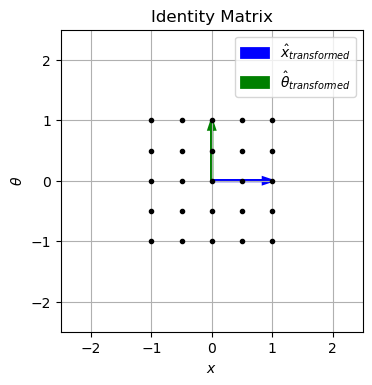

Matrix([
[1, 0],
[0, 1]])

In [29]:
matrix = eye(2)
plot_matrix(matrix)
plt.title('Identity Matrix')
plt.show()
matrix

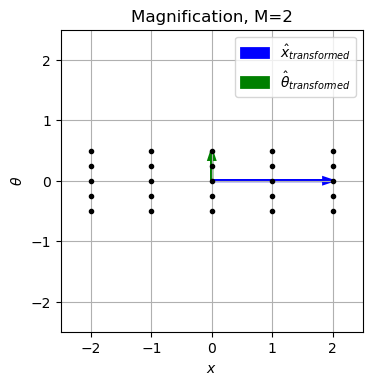

Matrix([
[2,   0],
[0, 0.5]])

In [30]:
M = 2
matrix = Matrix([[M, 0], [0, 1/M]])
plot_matrix(matrix)
plt.title(f'Magnification, M={M}')
plt.show()
matrix

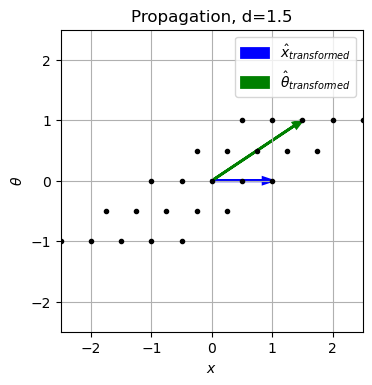

Matrix([
[1, 1.5],
[0,   1]])

In [31]:
d = 1.5
matrix = Matrix([[1, d], [0, 1]])
plot_matrix(matrix)
plt.title(f'Propagation, d={d}')
plt.show()
matrix

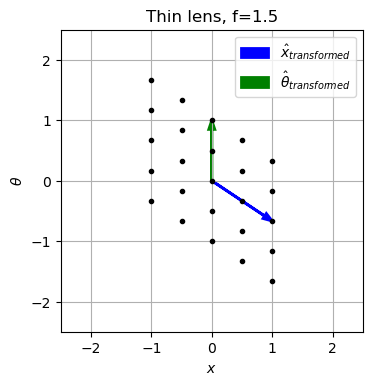

Matrix([
[                 1, 0],
[-0.666666666666667, 1]])

In [32]:
f = 1.5
matrix = Matrix([[1, 0], [-1/f, 1]])
plot_matrix(matrix)
plt.title(f'Thin lens, f={f}')
plt.show()
matrix

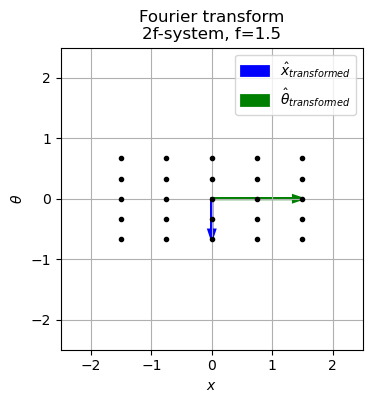

Matrix([
[                 0, 1.5],
[-0.666666666666667,   0]])

In [33]:
f = 1.5
d = 1.5
matrix = Matrix([[1, d], [0, 1]]) * Matrix([[1, 0], [-1/f, 1]]) * Matrix([[1, d], [0, 1]])
plot_matrix(matrix)
plt.title(f'Fourier transform\n2f-system, f={f}')
plt.show()
matrix

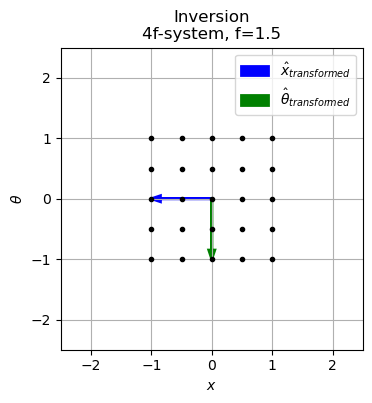

Matrix([
[-1.0,    0],
[   0, -1.0]])

In [34]:
f = 1.5
d = 1.5
matrix = Matrix([[1, d], [0, 1]]) * Matrix([[1, 0], [-1/f, 1]]) * Matrix([[1, d], [0, 1]]) * Matrix([[1, d], [0, 1]]) * Matrix([[1, 0], [-1/f, 1]]) * Matrix([[1, d], [0, 1]])
plot_matrix(matrix)
plt.title(f'Inversion\n4f-system, f={f}')
plt.show()
matrix

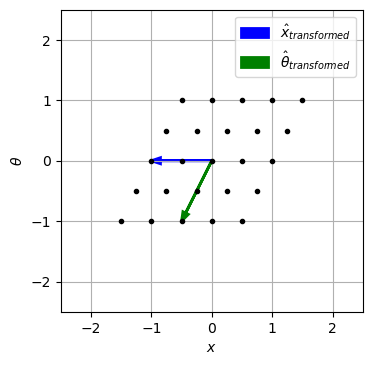

In [36]:
# Compute optical system matrices
z_SLM_num = 0.5
fobj1_num = 1
matrix = simplify(M_4f_23).subs(f5, f7).subs(z_SLM, z_SLM_num).subs(fobj1, fobj1_num)
plot_matrix(matrix)
plt.show()

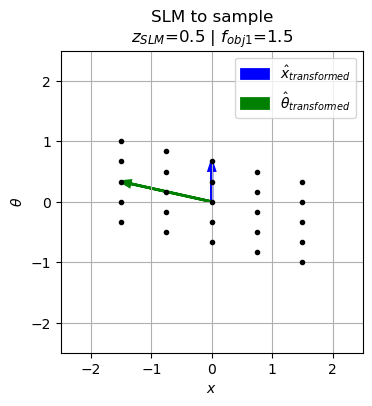

Matrix([
[    0,  -1.5],
[0.667, 0.333]])

In [44]:
z_SLM_num = 0.5
fobj1_num = 1.5
filled_in_matrix = M_SLM_to_sample.subs(f5, f7).subs(z_SLM, z_SLM_num).subs(fobj1, fobj1_num)

plot_matrix(filled_in_matrix)
plt.title(f'SLM to sample\n$z_{{SLM}}$={z_SLM_num} | $f_{{obj1}}$={fobj1_num}')
plt.show()

N(filled_in_matrix, 3)